# 문제: 기대수명 예측하기

- WHO가 제공하는 국가별 건강, 교육, 경제 데이터를 기반으로 기대 수명을 예측
- 193개국, 15년간 관측한 데이터 (2000~2015)로 20개의 특성 (feature) 사용
- X-y **선형회귀모델** 사용
- 여러 특성간의 관계를 파악

# 참고: 머신러닝

## 머신러닝 정의
- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다
 

- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 데이터

- Life Expectancy (WHO)
- 193개국, 15년간 관측한 데이터 (2000~2015)
- 결측치가 많은 국가는 제외
- 데이터 (2938,22)
 - Immunization related factors, Mortality factors, Economical factors and Social factors
 - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

## import

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               

## 데이터 읽기

In [46]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/Life%20Expectancy%20Data.csv")
print(data.shape)
data[:5]

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 결측치 처리
- 삭제
- 컬럼 삭제를 먼저 수행해야 한다

In [47]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [48]:
data = data.dropna()
print(data.shape)
data[:3]

(1649, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [49]:
data.Status.value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [50]:
data.Status = data.Status.map({"Developing":0, "Developed":1})
data[:3]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


## 데이터 백업

In [51]:
df = data.copy()

## 데이터 탐색

### 확률 분포

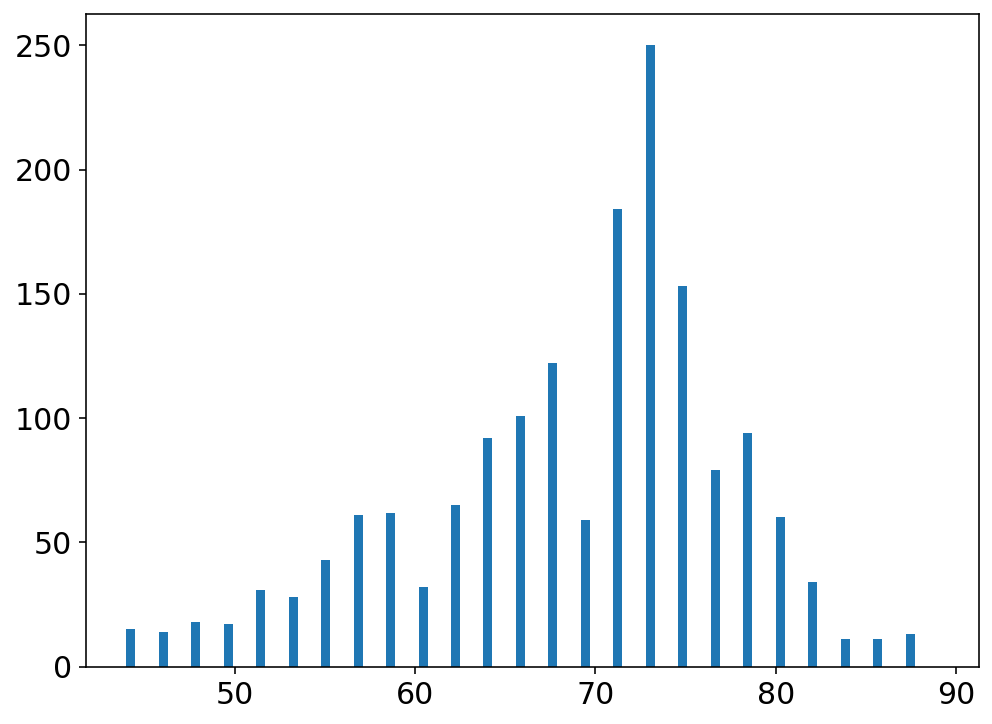

In [52]:
plt.hist(df['Life expectancy '], bins=25, width=0.5)
plt.show()

### 상관계수

In [53]:
df.corr()[:5]

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.034138,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,...,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Status,-0.034138,1.000000,0.442798,-0.278173,-0.108757,0.607782,0.461688,0.140351,-0.071963,0.298380,...,0.201917,0.192538,0.201654,-0.129555,0.484801,-0.034790,-0.308005,-0.307279,0.463615,0.512543
Life expectancy,0.050771,0.442798,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,...,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.278173,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,...,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.108757,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,...,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372


In [54]:
df.corr()['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
 BMI                               0.542042
Status                             0.442798
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
 thinness 5-9 years               -0.457508
 thinness  1-19 years             -0.457838
 HIV/AIDS                         -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy , dtype: float64

- (주의!) 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=500 align='left'>

### 히트맵

<AxesSubplot:>

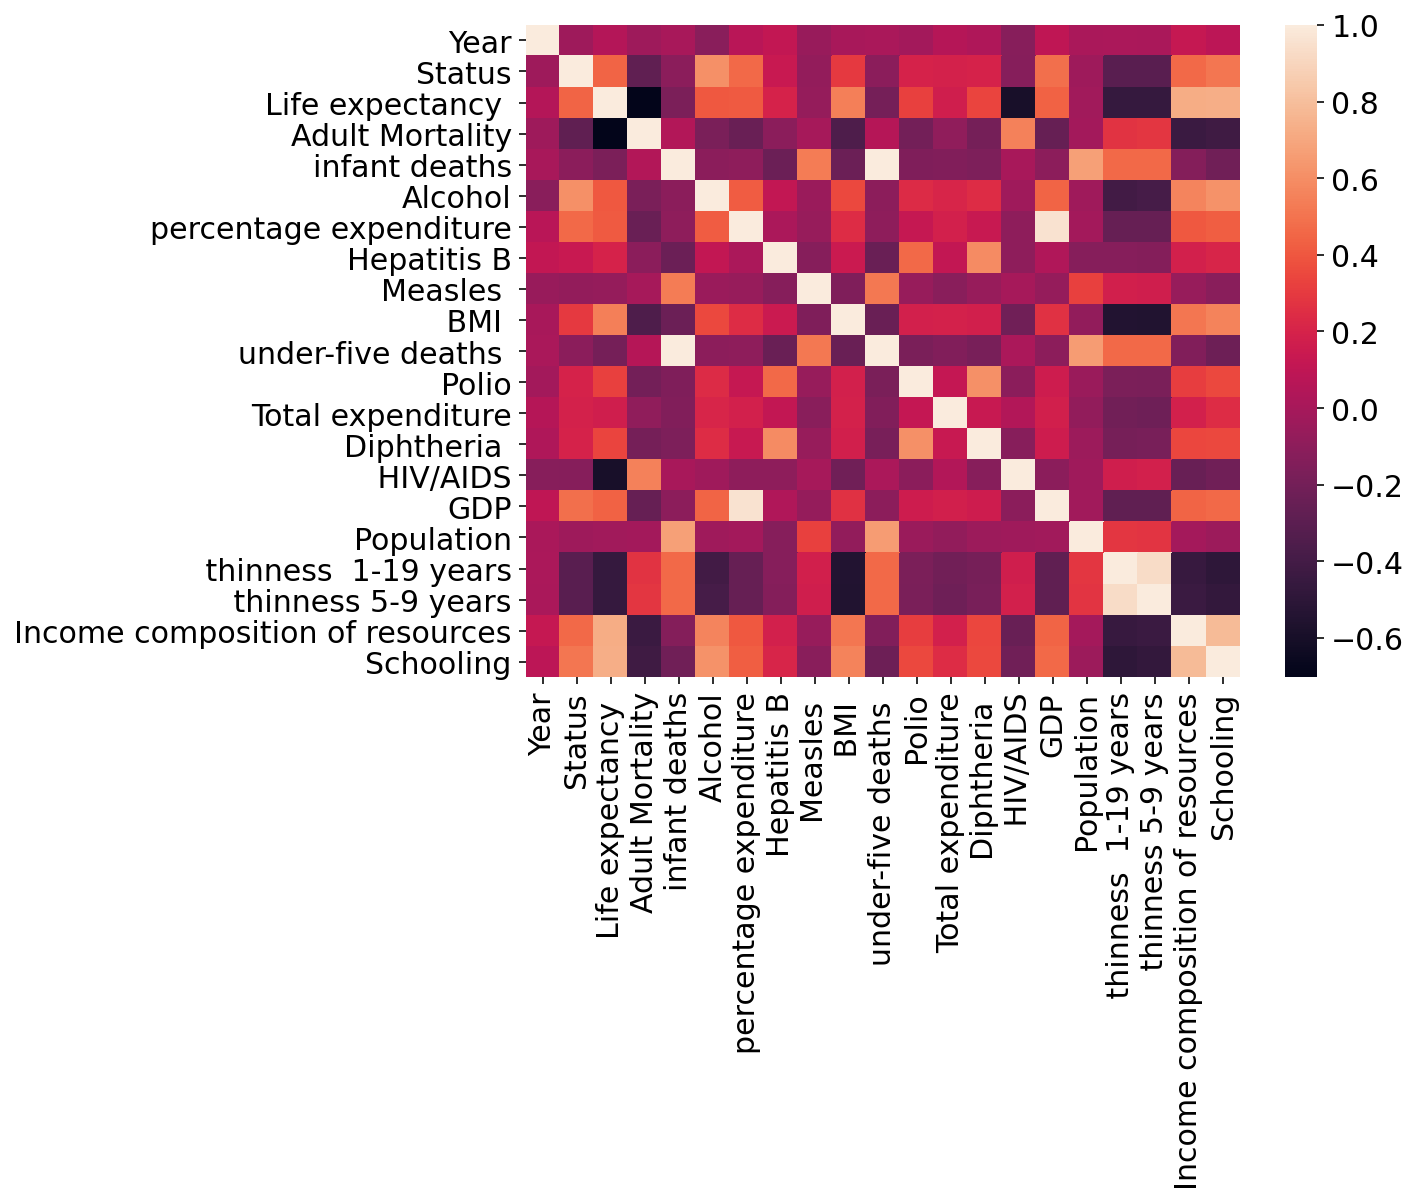

In [55]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### 산포도

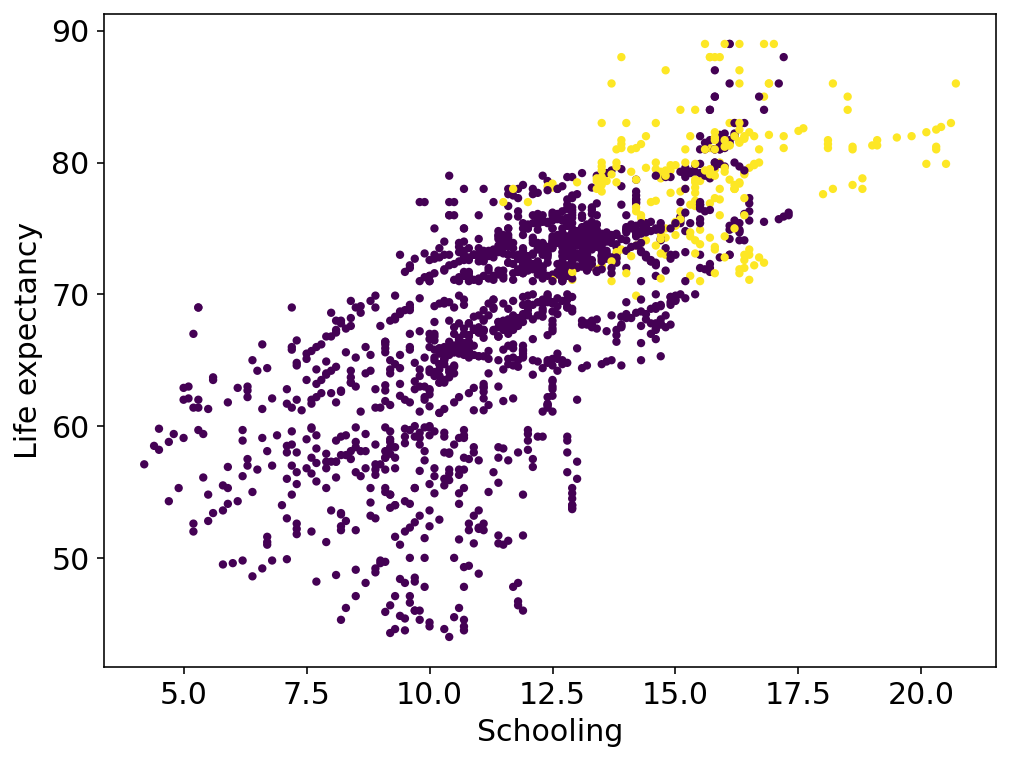

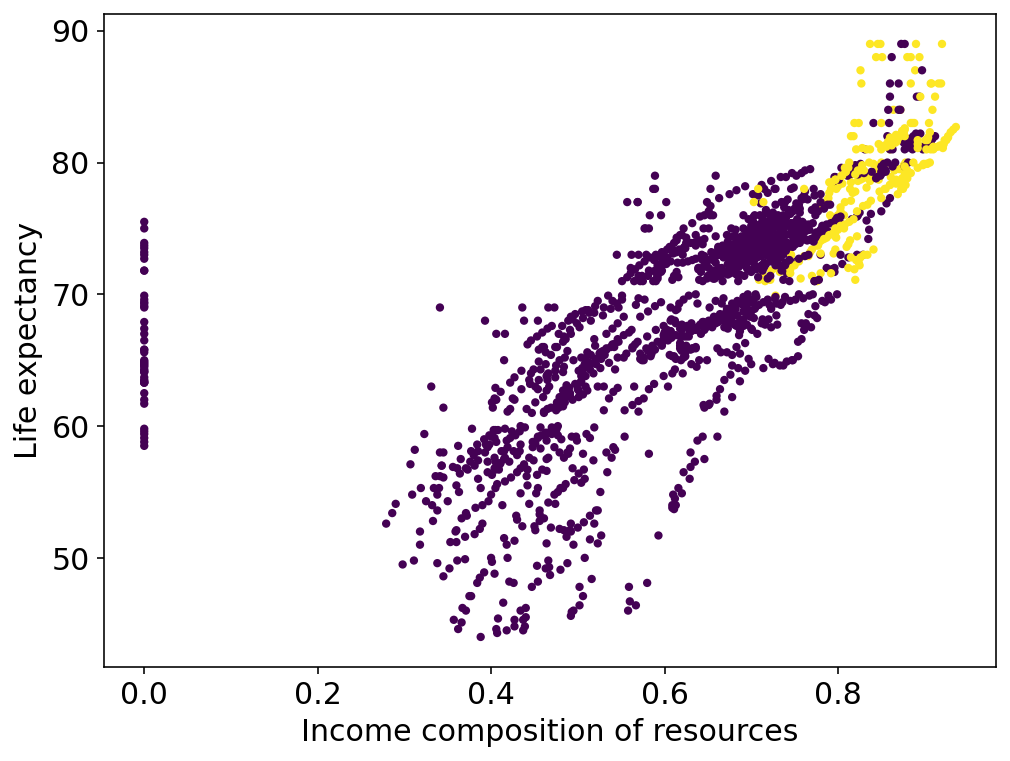

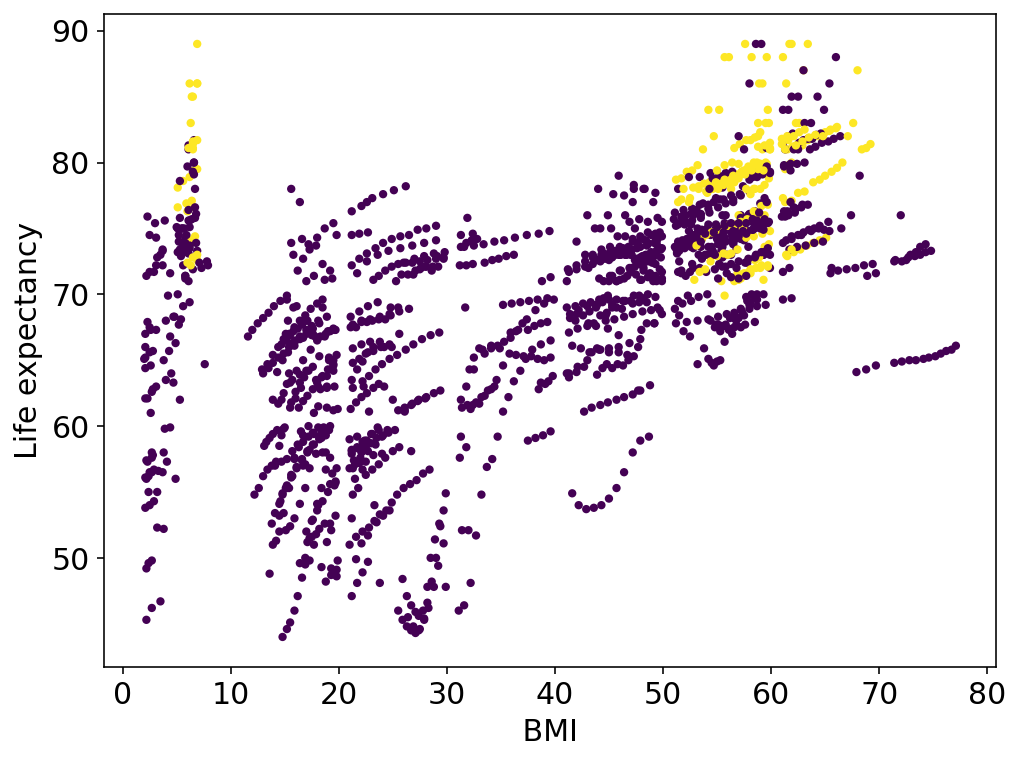

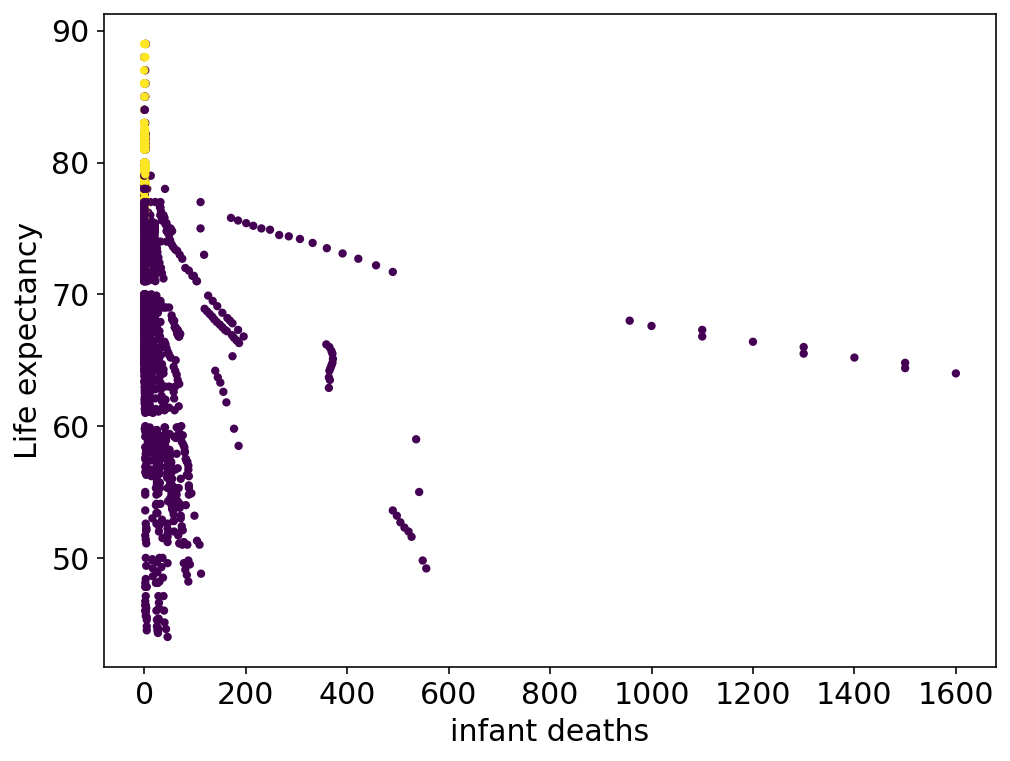

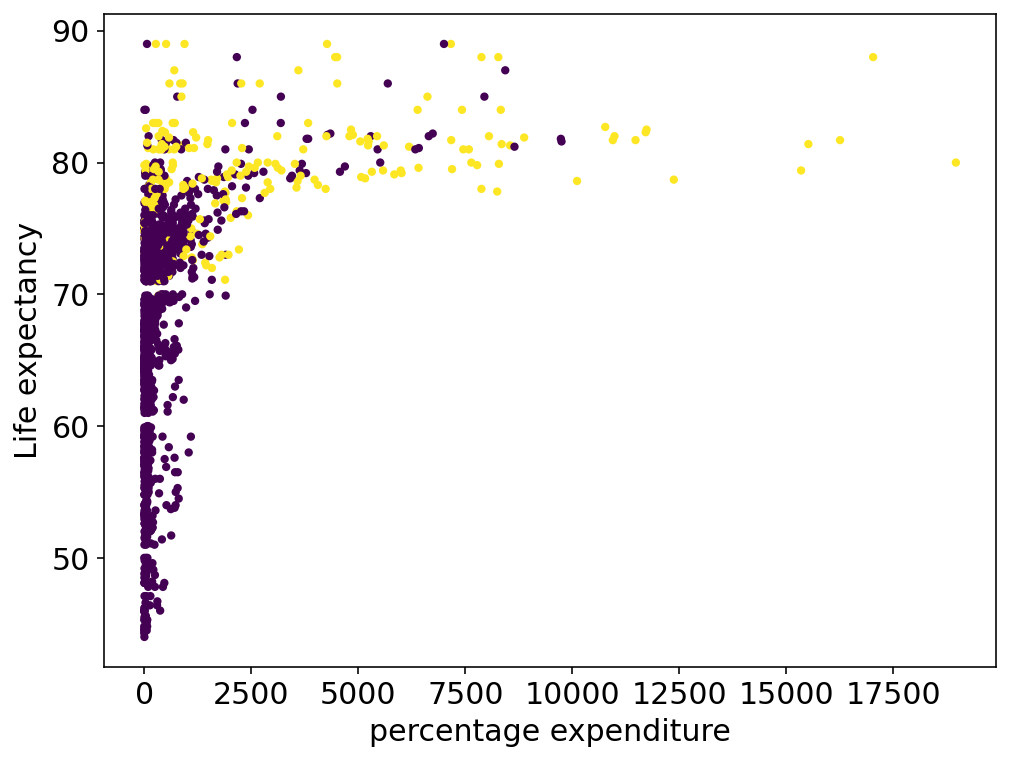

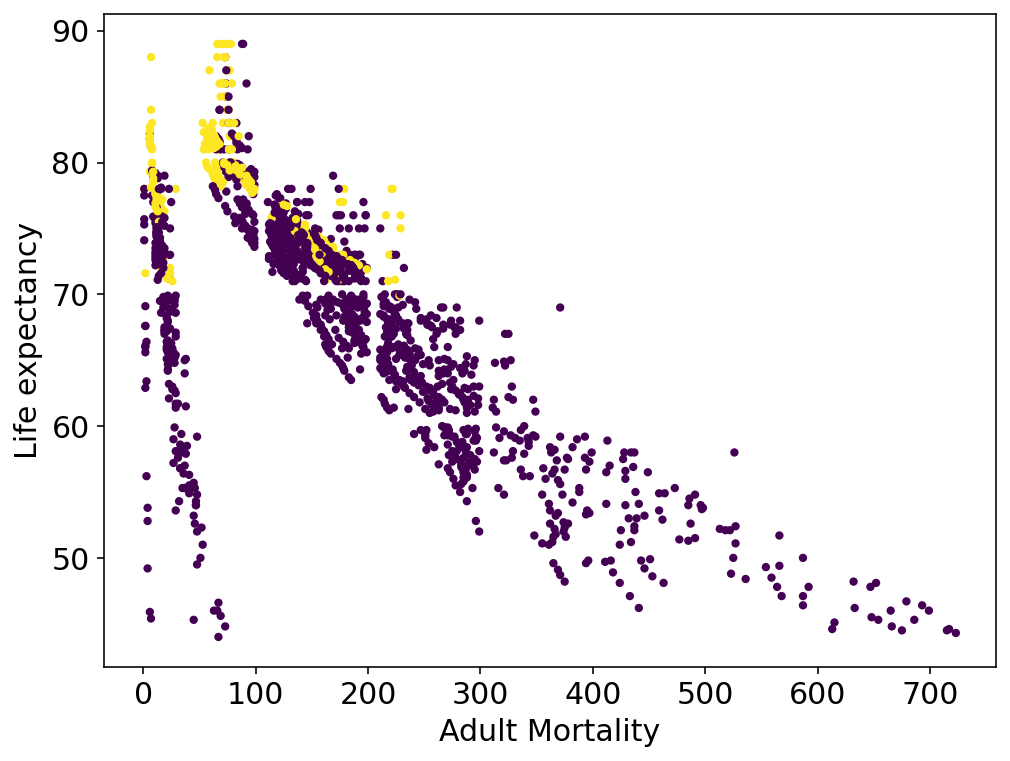

In [56]:
for col in ["Schooling", "Income composition of resources",
 " BMI " , 'infant deaths', 'percentage expenditure', 'Adult Mortality']:
    plt.scatter(df[col] , df['Life expectancy '], c=df.Status, s=10)
    plt.ylabel('Life expectancy')
    plt.xlabel(col)
    plt.show()

## 훈련 및 검증 데이터 나누기

- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

# 모델: 선형회귀 모델 

## 모델 생성, 학습, 사용 절차
- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

## 단변수 사용

In [57]:
X = df[['Schooling']]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test, y_test)

0.5173544342350661

In [58]:
a, b = linear_reg.coef_, linear_reg.intercept_
a, b

(array([2.29144294]), 41.499106997130376)

### 회귀직선

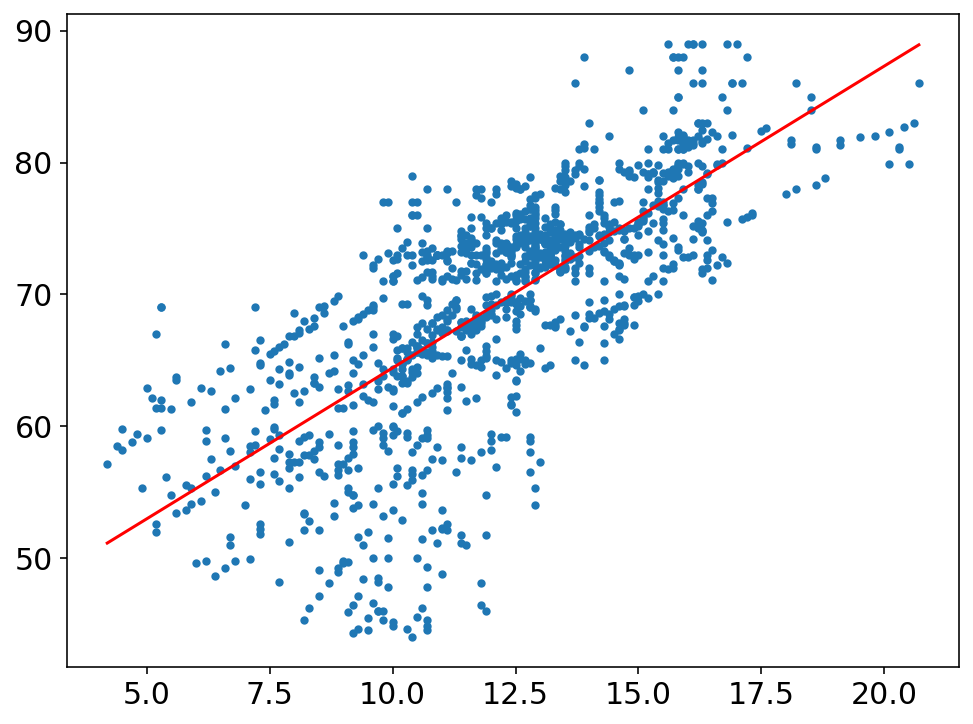

In [59]:
# 산포도
plt.scatter(X_train, y_train, s=10)

# 최소, 최대 지점 찾기
x_min = df.Schooling.min()
x_max = df.Schooling.max()

# 회귀 직선 그리기
xs = np.array((x_min, x_max))
ys = a*xs + b
plt.plot(xs,ys,c="red")
plt.show()

### 참고: 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [63]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round((y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      mean_absolute_error(y_test,y_pred).round(3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))
    print("Mean Absolute Percentile Error: ", 
      mean_absolute_percentage_error(y_test,y_pred).round(3))
    print("Percent Estimation: ", 
      (100*(1-mean_absolute_percentage_error(y_test,y_pred))).round(3),'%')

In [64]:
y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  10.566
Mean Absolute Error:  4.436
Root Mean Squared Error:  5.788
R-Squared:  0.517
Mean Absolute Percentile Error:  0.069
Percent Estimation:  93.142 %


### 모델 사용

In [65]:
linear_reg.predict(np.array([[10],[12],[14]]))

array([64.41353642, 68.99642231, 73.57930819])

## 두개의 변수 사용

In [66]:
X = df[["Schooling",'Status']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test, y_test)
a1, a2, b = linear_reg.coef_[0], linear_reg.coef_[1],linear_reg.intercept_
a1, a2, b

(2.178082168706548, 2.6473451433016293, 42.42681993451452)

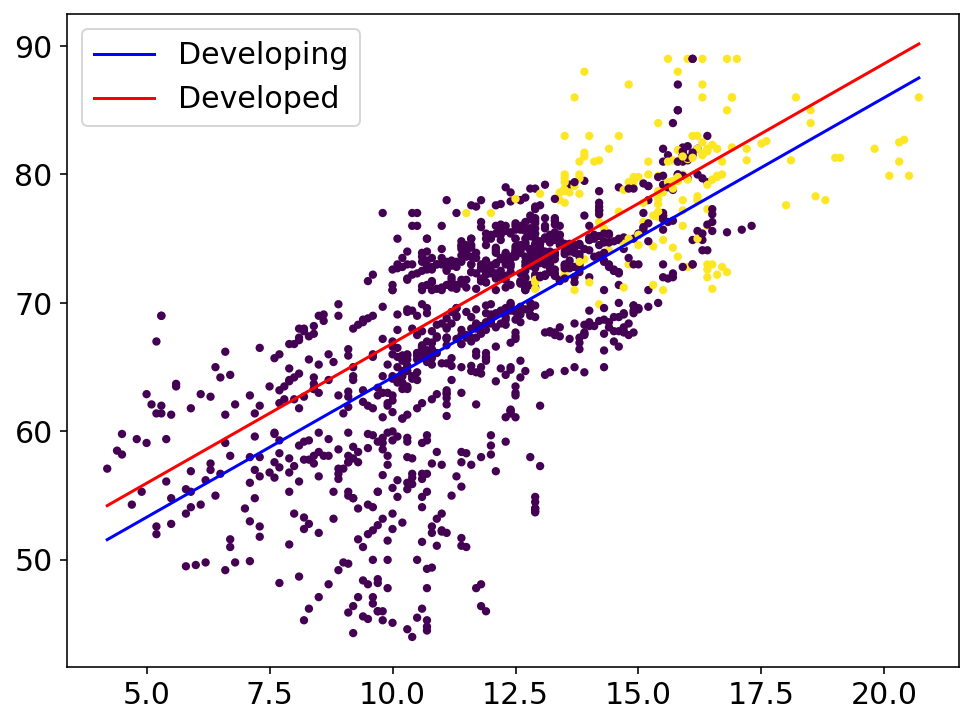

In [67]:
plt.scatter(X_train.Schooling,y_train, c=X_train.Status, s=10)

x_min = df.Schooling.min()
x_max = df.Schooling.max()

xs = np.array((x_min, x_max))
ys = a1*xs + a2*0 + b
plt.plot(xs,ys,c="b", label="Developing")
ys = a1*xs + a2*1 + b
plt.plot(xs,ys,c="r", label="Developed")
plt.legend()
plt.show()

In [68]:
y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  13.921
Mean Absolute Error:  4.437
Root Mean Squared Error:  5.674
R-Squared:  0.536
Mean Absolute Percentile Error:  0.067
Percent Estimation:  93.299 %


## 모든 변수 사용 

- 다중 회귀 모델
 - 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
 - $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
 - $x_{1}$: 성별, $x_{2}$: 키

In [69]:
features = data.columns.difference(['Country','Life expectancy '])
features

Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Measles ', 'Polio', 'Population',
       'Schooling', 'Status', 'Total expenditure', 'Year', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [70]:
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  10.459
Mean Absolute Error:  2.671
Root Mean Squared Error:  3.461
R-Squared:  0.85
Mean Absolute Percentile Error:  0.04
Percent Estimation:  95.99 %


## 스케일링

In [71]:
X.dtypes

 BMI                               float64
 HIV/AIDS                          float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Adult Mortality                    float64
Alcohol                            float64
Diphtheria                         float64
GDP                                float64
Hepatitis B                        float64
Income composition of resources    float64
Measles                              int64
Polio                              float64
Population                         float64
Schooling                          float64
Status                               int64
Total expenditure                  float64
Year                                 int64
infant deaths                        int64
percentage expenditure             float64
under-five deaths                    int64
dtype: object

In [72]:
cont_features = X.columns.difference(['Status'])
cont_features

Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Measles ', 'Polio', 'Population',
       'Schooling', 'Total expenditure', 'Year', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [73]:
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X[:3]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,-0.963560,-0.312389,2.685909,2.663654,0.756629,-1.122948,-0.887941,-0.434239,-0.555446,-0.833462,-0.106171,-3.455955,0.270913,-0.722799,0,0.958840,1.751998,0.243745,-0.356909,0.238134
1,-0.988878,-0.312389,2.751157,2.706643,0.820490,-1.122948,-1.027006,-0.431760,-0.672648,-0.849853,-0.171828,-1.139051,-0.203382,-0.758583,0,0.967541,1.507289,0.260300,-0.355633,0.256557
2,-1.014197,-0.312389,2.794656,2.749632,0.796542,-1.122948,-0.934296,-0.430100,-0.594514,-0.882634,-0.177977,-0.960828,0.242452,-0.794367,0,0.945790,1.262579,0.276854,-0.355806,0.274979


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  10.462
Mean Absolute Error:  2.706
Root Mean Squared Error:  3.517
R-Squared:  0.836
Mean Absolute Percentile Error:  0.041
Percent Estimation:  95.94 %


# 결과: 회귀결과 그래프

## 샘플 예측 비교

In [75]:
y_pred = linear_reg.predict(X_test)
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result

,y_test,y_pred
2930,46.6,55.341819
426,53.4,54.071944
2849,75.0,68.845377
1556,64.7,67.757092
2256,62.8,61.264277
...,...,...
232,69.8,71.881954
2018,72.2,72.168600
779,72.3,70.387745
449,73.0,70.738094


<AxesSubplot:>

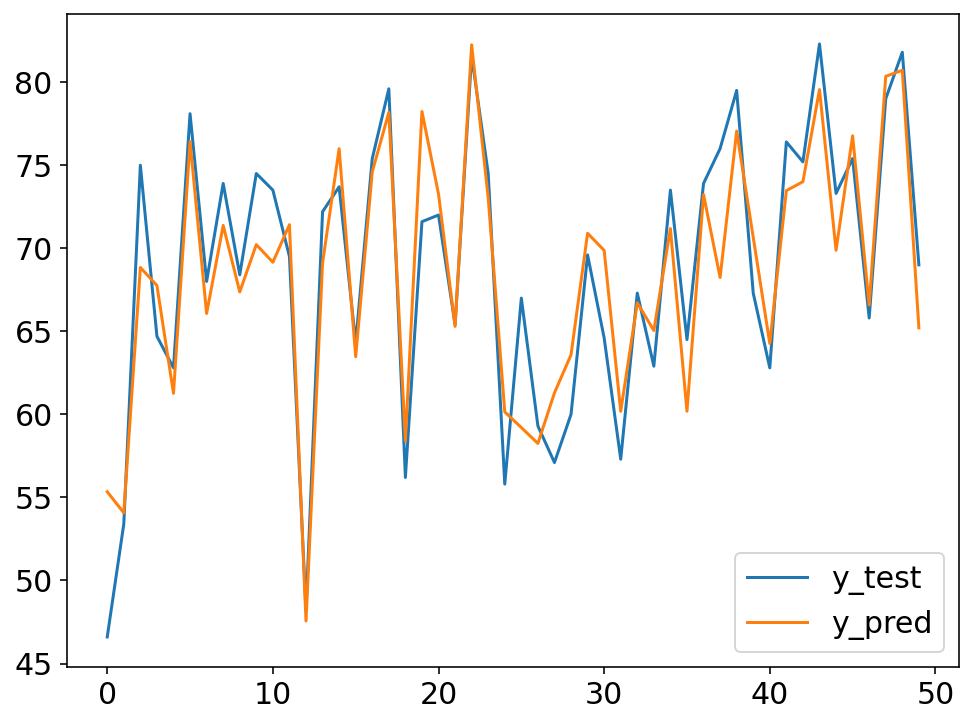

In [76]:
result.reset_index(drop=True)[:50].plot()

In [77]:
X_test[:10]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
2930,-0.502759,3.601032,0.728466,0.707651,-0.807961,-0.162165,-0.517101,-0.450562,-0.281976,-1.188589,-0.196623,-0.470714,-0.189109,-0.901719,0,-0.646423,-0.205681,-0.029410,-0.380486,0.010930
426,-1.216746,0.384068,0.728466,0.729146,1.602785,0.249953,0.131869,-0.483809,0.304033,-1.887916,-0.220624,-0.069711,-0.102647,-2.333082,0,1.689692,-0.695101,-0.070797,-0.396445,-0.044336
2849,0.469478,-0.312389,-0.728742,-0.732483,-0.121458,-0.832478,-0.795231,-0.249997,-0.711715,-0.270723,-0.220624,-0.782605,-0.207713,-0.508095,0,-0.998798,0.039029,-0.269455,-0.201078,-0.271541
1556,-0.943305,-0.262642,0.532721,0.492706,-1.159196,-0.909440,-0.470746,-0.444920,-0.203841,-0.675021,-0.220029,-0.470714,0.117939,-0.651231,0,-0.785633,1.262579,-0.029410,-0.352230,-0.025914
2256,-1.788949,-0.229477,-0.663494,-0.689494,0.453290,-1.055916,0.178224,-0.484178,0.343100,-1.073856,-0.220029,0.153068,-0.190657,-1.796321,0,-0.441959,0.039029,-0.087352,-0.396820,-0.062758
630,0.879641,-0.312389,-0.663494,-0.667999,-1.215074,-0.236644,0.178224,0.229540,0.382167,0.641680,-0.220624,0.420403,-0.201580,0.422291,0,1.611387,0.528449,-0.261178,0.954137,-0.265401
2368,0.332757,-0.312389,-0.793991,-0.796966,0.197847,-0.854822,0.224579,-0.474202,0.382167,-0.778827,-0.220624,0.464959,-0.207259,-1.044856,0,0.006123,0.039029,-0.269455,-0.386209,-0.271541
570,-0.710373,-0.312389,0.032486,-0.109141,-0.552518,-0.400499,0.131869,-0.332329,0.186831,0.013379,12.099337,0.153068,-0.207843,-0.543879,0,-0.563767,-0.695101,2.478649,-0.299832,2.135602
1817,-1.074962,-0.295806,2.533664,2.577676,0.030212,-1.058399,0.363644,-0.424838,0.499369,-0.560288,0.013340,0.375847,0.179922,-0.042902,0,0.336747,0.773159,-0.087352,-0.333685,-0.105743
1862,0.763175,-0.312389,-0.663494,-0.689494,-0.161371,-0.244092,0.641774,-0.312974,0.733772,0.024306,-0.220624,0.687738,-0.199316,-0.186038,0,1.498279,1.507289,-0.252901,-0.128419,-0.253119


## Residue 플롯

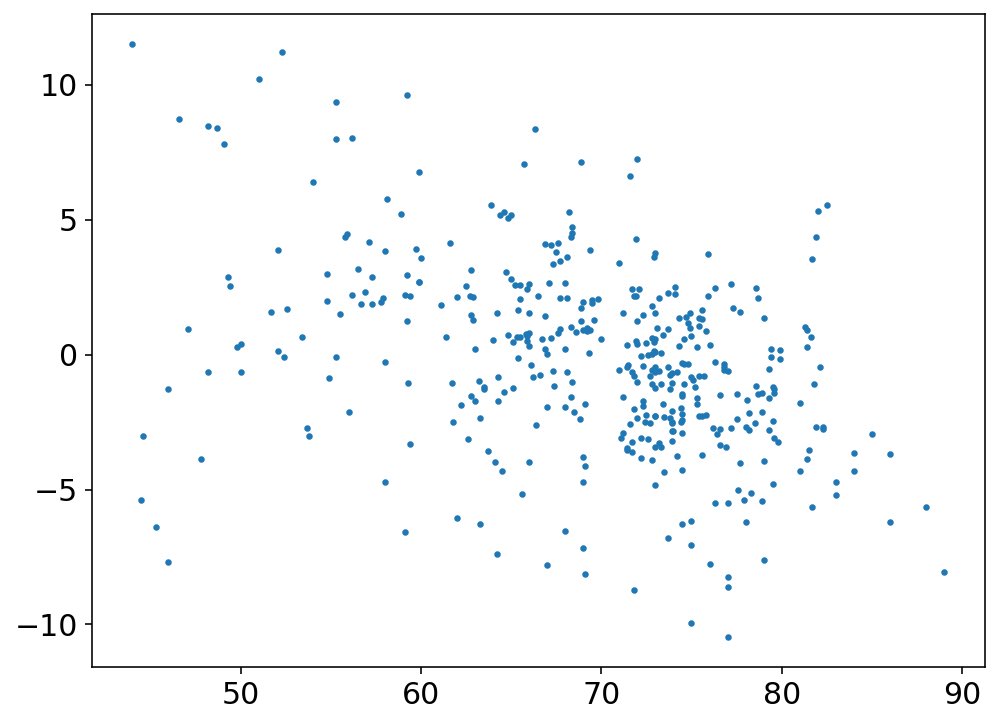

In [78]:
plt.scatter(y_test, y_pred-y_test, s=5)

## 선형 계수

In [79]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    fig_size= 8
    if len(features) > 30: fig_size=12
    if len(features) > 40: fig_size=18
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(8,fig_size))
    plt.xlabel('Features Importance/Weights')
    plt.gca().legend_ = None

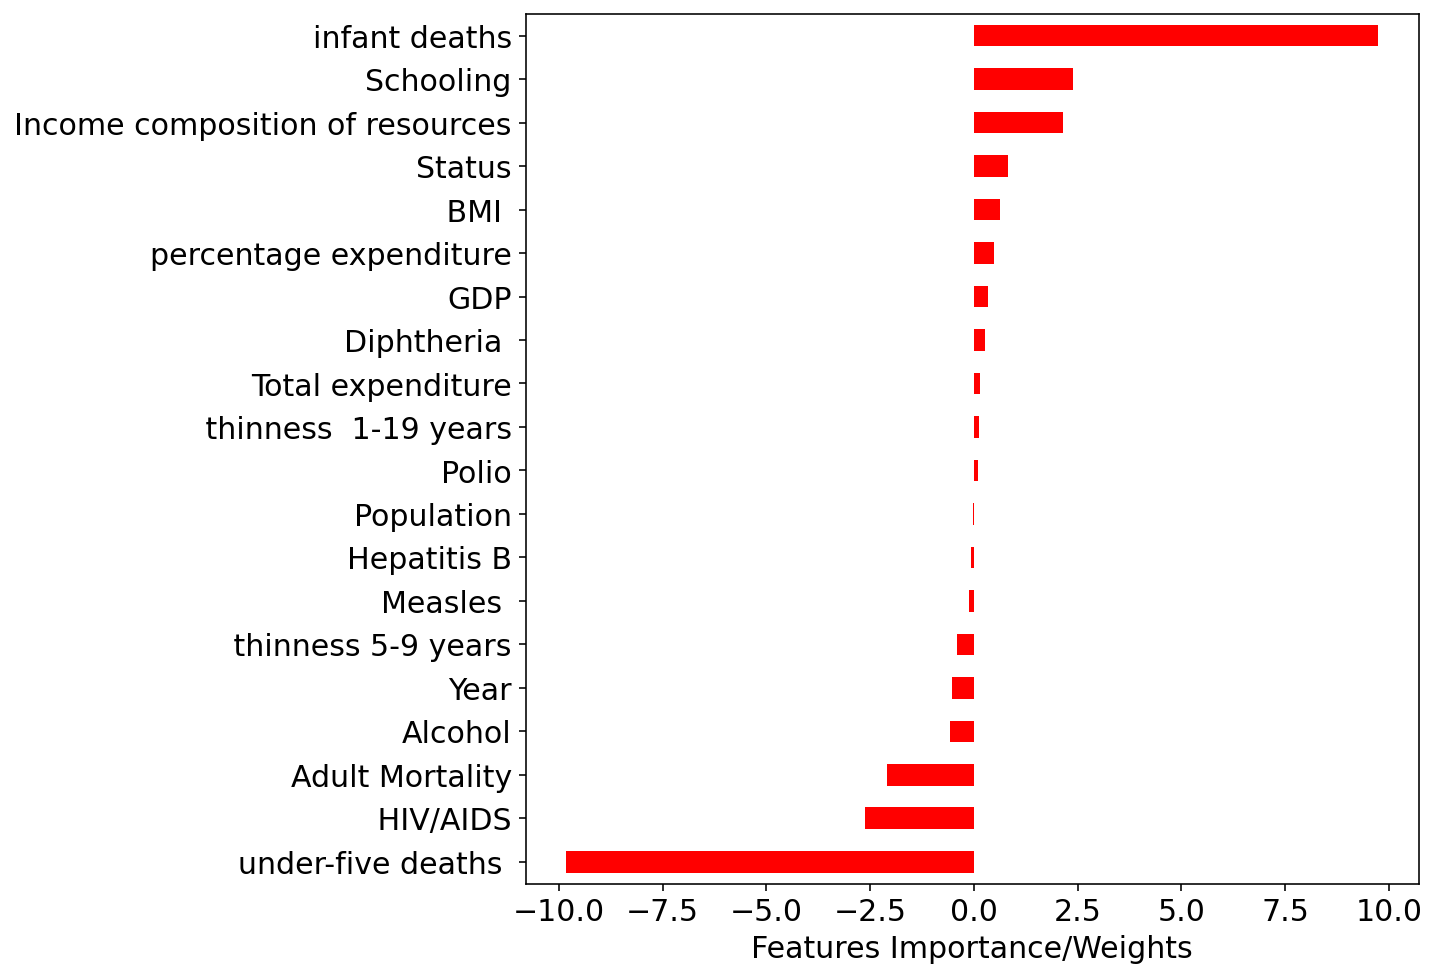

In [80]:
plot_features_weights(X.columns, linear_reg.coef_)

## 상관계수

In [81]:
df_corr = df.corr()['Life expectancy '].sort_values(ascending=False).to_frame()
df_corr

,Life expectancy
Life expectancy,1.000000
Schooling,0.727630
Income composition of resources,0.721083
BMI,0.542042
Status,0.442798
GDP,0.441322
percentage expenditure,0.409631
Alcohol,0.402718
Diphtheria,0.341331
Polio,0.327294


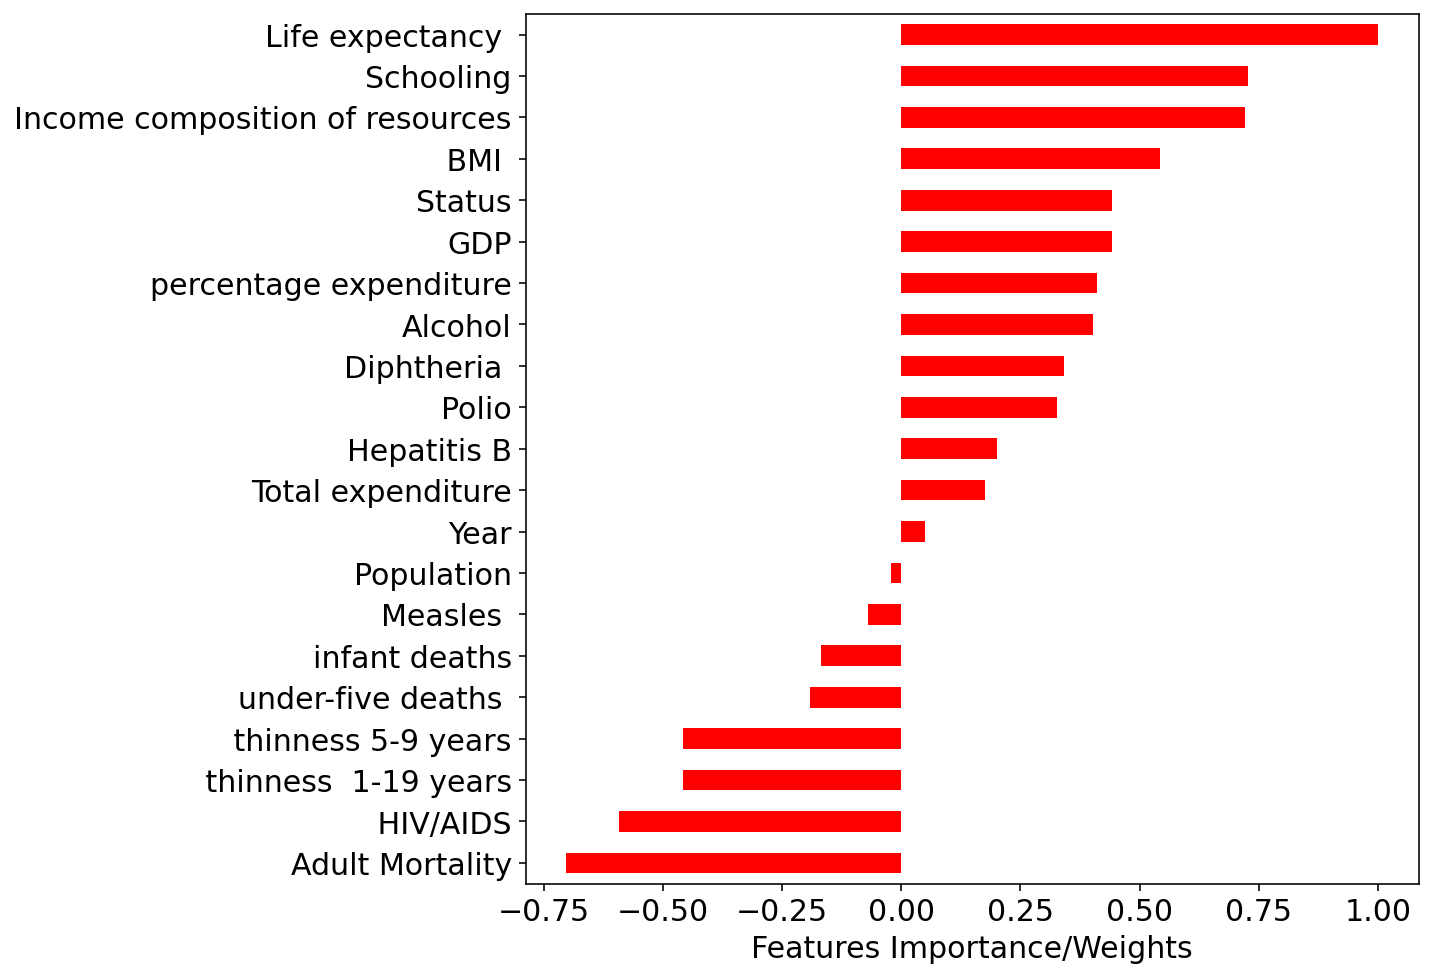

In [82]:
plot_features_weights(df_corr.index, df_corr['Life expectancy '])

## 특성중요도 (결정트리 회귀)

In [83]:
model = DecisionTreeRegressor() # 모델 생성
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
y_pred = model.predict(X_test)
show_reg_result(y_test, y_pred)

Max Error:  9.8
Mean Absolute Error:  1.543
Root Mean Squared Error:  2.44
R-Squared:  0.921
Mean Absolute Percentile Error:  0.023
Percent Estimation:  97.695 %


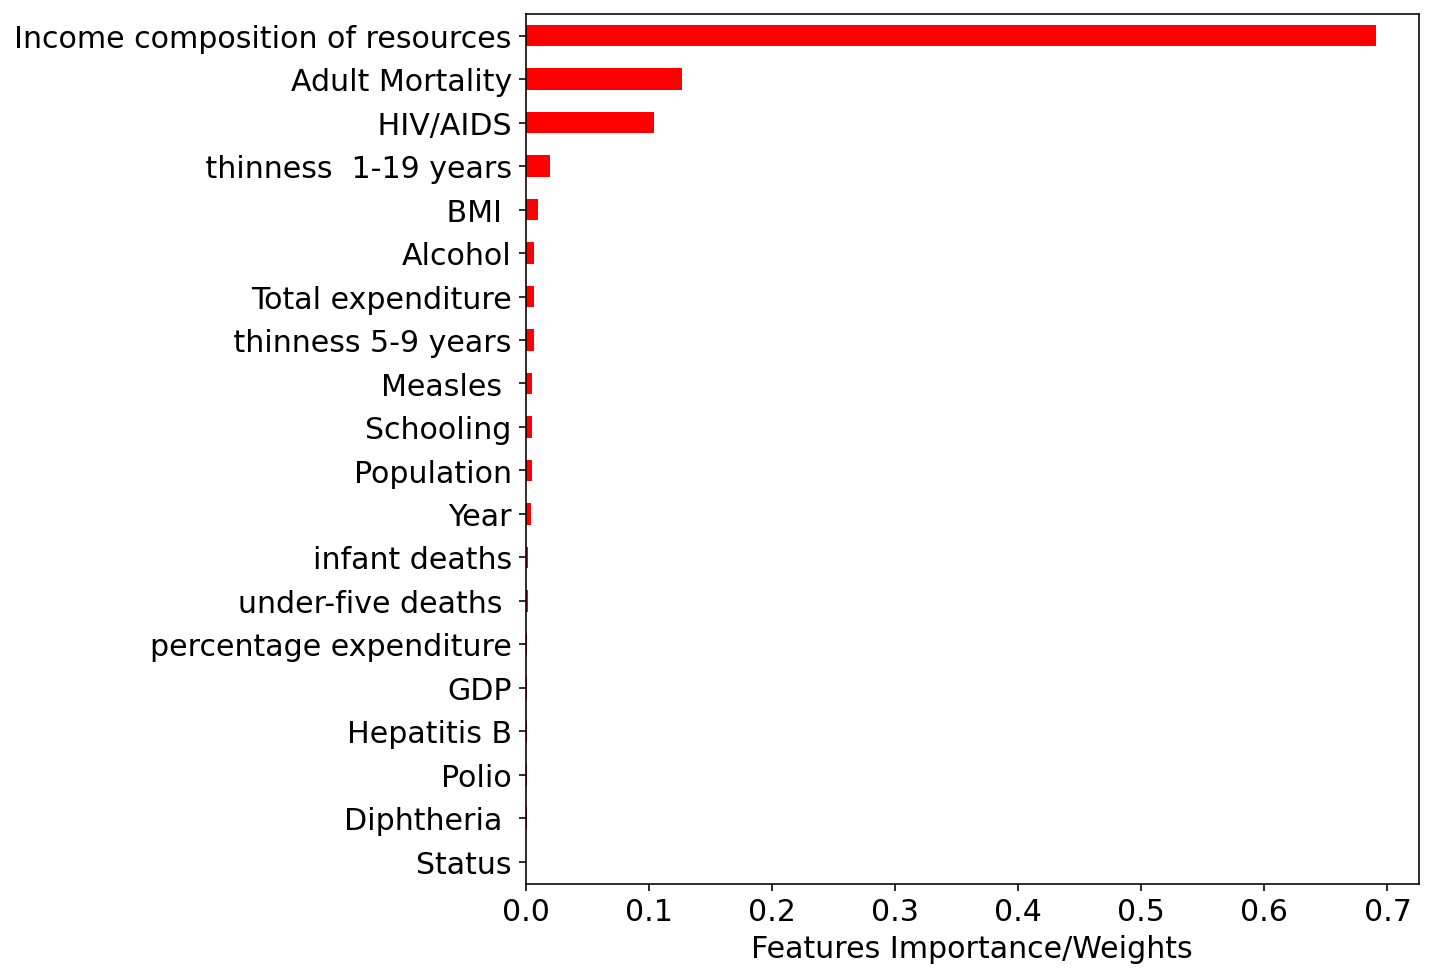

In [85]:
plot_features_weights(X.columns, model.feature_importances_)